<a href="https://colab.research.google.com/github/cqqqj/shen-du-xue-xi/blob/main/%E2%80%9C03_Pandas%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

<img src="https://raw.githubusercontent.com/LisonEvf/practicalAI-cn/master/images/logo.png" width=150>

在本文中，我们将学习使用Python Pandas库进行数据分析的基础知识。

<img src="https://raw.githubusercontent.com/LisonEvf/practicalAI-cn/master/images/pandas.png" width=500>




# 下载数据

首先，我们要获得一些数据。我们将从下面的公共链接中下载titanic数据集。

In [25]:
import urllib

In [26]:
# 将数据从GitHub下载到笔记本电脑的本地磁盘
url = "https://raw.githubusercontent.com/LisonEvf/practicalAI-cn/master/data/titanic.csv"
response = urllib.request.urlopen(url)
html = response.read()
with open('titanic.csv', 'wb') as f:#只写模式打开'titanic.csv文件
    f.write(html)

In [27]:
# 检查数据是否已下载成功
!ls -l

total 88
drwxr-xr-x 1 root root  4096 Apr  7 13:43 sample_data
-rw-r--r-- 1 root root 85153 Apr 10 06:52 titanic.csv


# 加载数据

现在我们有一些数据可以使用，让我们加载到Pandas数据帧（dataframe）中。Pandas是一个很棒的python数据库分析库。

In [28]:
import pandas as pd

In [29]:
# 从CSV读取到Pandas DataFrame
df = pd.read_csv("titanic.csv", header=0)
#指定 CSV 文件的第一行（索引为 0）作为列名，第二行作为索引为0的开始行

In [30]:
# 前五项
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


<ipython-input-31-e8b4d9cedf34>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='age', y='sex', inner='box', palette='Dark2')


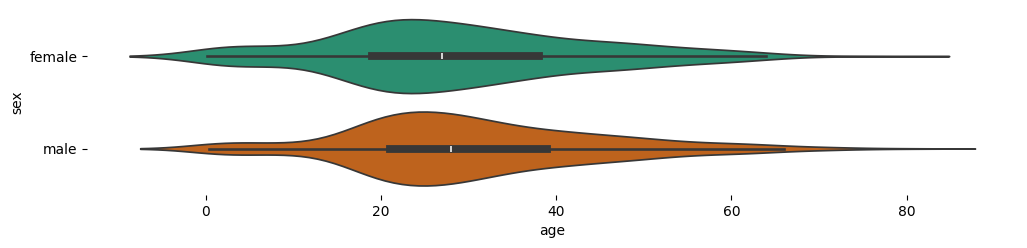

In [31]:
# @title sex vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

他们有不同的特征:
* pclass: class of travel
* name: full name of the passenger
* sex: gender
* age: numerical age
* sibsp: # of siblings/spouse aboard
* parch: number of parents/child aboard
* ticket: ticket number
* fare: cost of the ticket
* cabin: location of room
* emarked: port that the passenger embarked at (C - Cherbourg, S - Southampton, Q = Queenstown)
* survived: survial metric (0 - died, 1 - survived)

# 探索性分析

我们将使用Pandas库，看看如何探索和处理我们的数据。

In [32]:
# 描述性统计
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


<Axes: >

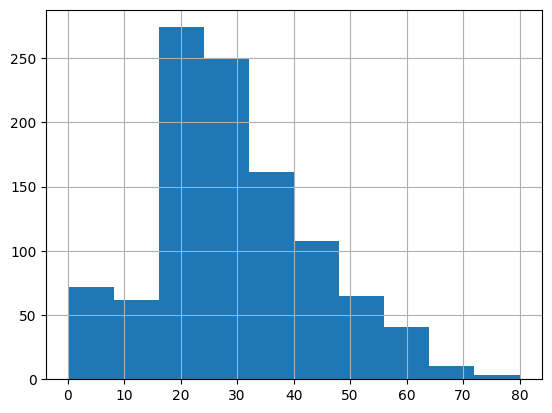

In [33]:
# 直方图
df["age"].hist()
#df.loc[:,"age"].hist()

In [34]:
# 唯一值
df["embarked"].unique()#返回该列中所有唯一的值（即去重后的值）。返回的结果是一个 NumPy 数组，包含所有不重复的元素

array(['S', 'C', nan, 'Q'], dtype=object)

In [35]:
# 根据特征选择数据
df["name"].head(10)

,name
0,"Allen, Miss. Elisabeth Walton"
1,"Allison, Master. Hudson Trevor"
2,"Allison, Miss. Helen Loraine"
3,"Allison, Mr. Hudson Joshua Creighton"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"
5,"Anderson, Mr. Harry"
6,"Andrews, Miss. Kornelia Theodosia"
7,"Andrews, Mr. Thomas Jr"
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)"
9,"Artagaveytia, Mr. Ramon"


In [36]:
# 筛选
df[df["sex"]=="female"].head() # 只有女性数据出现

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1


In [37]:
# 排序
df.sort_values("age", ascending=False).head()#默认升序，ascending=False后是降序

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
14,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1
61,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,1
1235,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0
135,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0


In [43]:
# Grouping（数据聚合与分组运算）
#sex_group = df.groupby("survived")
#sex_group.mean()#mean会返回dataframe数组
sex_group = df.groupby('survived')#按照'survived'分割成了'survived'=0和'survived'=1的Dataframe两组数组
mean_values=sex_group[['age', 'fare']].mean()#接着对分割成的两个数组都按照索引['age', 'fare']（花式索引）计算品均值
print(mean_values)
#


                age       fare
survived                      
0         30.545369  23.353831
1         28.918228  49.361184


1
np[0, 1] —— 单个元素的访问
​语法: np[行索引, 列索引]

​解释: 使用逗号分隔的索引来访问数组中的单个元素。

​示例:

python
element = np[0, 1]
print(element)  # 输出: 20
​说明: 这里 np[0, 1] 访问的是第0行第1列的元素，即 20。

2
np[[0, 1]] —— 行的切片（高级索引）
​语法: np[[行索引列表]]

​解释: 使用包含行索引的列表进行索引，这会返回一个新的数组，包含指定行的所有列。这种索引方式被称为高级索引​（Advanced Indexing），它会返回一个副本而不是视图（view）。

​示例:

python
sub_array = np[[0, 1]]
print(sub_array)
# 输出:
# [[10 20 30]
#  [40 50 60]]
​说明: np[[0, 1]] 返回的是一个新的二维数组，包含原数组的第0行和第1行。


# 进阶 df[["sex","age"]]就是针对dataframe数组的特征列的高级索引，针对两个特征列进行操作 df[[特征列索引列表]]  相当于 df.loc[:, ["sex", "age"]]

In [44]:
# iloc根据位置的索引来访问
df.iloc[0, :] # iloc在索引中的特定位置获取行（或列）（因此它只需要整数）

,0
pclass,1
name,"Allen, Miss. Elisabeth Walton"
sex,female
age,29.0
sibsp,0
parch,0
ticket,24160
fare,211.3375
cabin,B5
embarked,S


In [46]:
# 获取指定位置的数据
df.iloc[0, 1] #索引为0的行以及索引为1的列的数据


'Allen, Miss. Elisabeth Walton'

In [45]:
# loc根据标签的索引来访问，返回一个series(有标签)的数组
df.loc[0] # df.loc[0] 返回 DataFrame 中索引为 0 的一行。返回的结果是一个 Series 对象

,0
pclass,1
name,"Allen, Miss. Elisabeth Walton"
sex,female
age,29.0
sibsp,0
parch,0
ticket,24160
fare,211.3375
cabin,B5
embarked,S


# 预处理

In [48]:
# 具有至少一个NaN值的行
df[pd.isnull(df).any(axis=1)].head()
#df[].head（） []内为高级索引df[["head"，"age"]]或条件索引df[df["age"]>5]


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0
13,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,1
15,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,0
23,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,1
25,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,0


1：​**pd.isnull(df)**:
​功能：pd.isnull 函数用于检测输入的数据结构（如DataFrame）中的缺失值（NaN 或 None）。
​结果：返回一个与 df 形状相同的布尔型 DataFrame，其中缺失值的位置为 True，非缺失值的位置为 False。
生成的dataframe：
  A      B      C
0 False  False  False
1 False  True  False
2  True   True  False
3 False  False  False 生成表格
Ps:有缺失值为True,没有缺失才为false

2： df.any(axis=1)**:
​功能：any 函数用于检测布尔型数据中是否存在 True 值。
​参数 axis=1：表示沿着水平的方向（横向）进行操作，即对每一行进行检查。
​结果：返回一个一维的布尔型 Series，其中每个元素表示对应行是否至少有一个 True（即是否存在至少一个缺失值）。

返回的series：
每一行是否有至少一个 True 值:
0     True
1     True
2     True
3    False
dtype: bool

In [ ]:
# 删除具有Nan值的行
df = df.dropna() # 删除具有NaN值的行
df = df.reset_index() # 重置行索引
df.head()

In [ ]:
# 删除多行
df = df.drop(["name", "cabin", "ticket"], axis=1) # we won't use text features for our initial basic models
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,1,female,29.0000,0,0,211.3375,S,1
1,1,1,male,0.9167,1,2,151.5500,S,1
2,2,1,female,2.0000,1,2,151.5500,S,0
3,3,1,male,30.0000,1,2,151.5500,S,0
4,4,1,female,25.0000,1,2,151.5500,S,0


In [ ]:
# 映射特征值
df['sex'] = df['sex'].map( {'female': 0, 'male': 1} ).astype(int)
df["embarked"] = df['embarked'].dropna().map( {'S':0, 'C':1, 'Q':2} ).astype(int)
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,1,0,29.0000,0,0,211.3375,0,1
1,1,1,1,0.9167,1,2,151.5500,0,1
2,2,1,0,2.0000,1,2,151.5500,0,0
3,3,1,1,30.0000,1,2,151.5500,0,0
4,4,1,0,25.0000,1,2,151.5500,0,0


# 特征工程

In [ ]:
# lambda表达式创建新特征
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size

df["family_size"] = df[["sibsp", "parch"]].apply(lambda x: get_family_size(x["sibsp"], x["parch"]), axis=1)
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived,family_size
0,0,1,0,29.0000,0,0,211.3375,0,1,0
1,1,1,1,0.9167,1,2,151.5500,0,1,3
2,2,1,0,2.0000,1,2,151.5500,0,0,3
3,3,1,1,30.0000,1,2,151.5500,0,0,3
4,4,1,0,25.0000,1,2,151.5500,0,0,3


In [ ]:
# 重新组织标题
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'family_size', 'fare', 'embarked', 'survived']]
df.head()

,pclass,sex,age,sibsp,parch,family_size,fare,embarked,survived
0,1,0,29.0000,0,0,0,211.3375,0,1
1,1,1,0.9167,1,2,3,151.5500,0,1
2,1,0,2.0000,1,2,3,151.5500,0,0
3,1,1,30.0000,1,2,3,151.5500,0,0
4,1,0,25.0000,1,2,3,151.5500,0,0


# 保存数据

In [ ]:
# 保存数据帧（dataframe）到 CSV
df.to_csv("processed_titanic.csv", index=False)

In [ ]:
# 看你一下你保持的文件
!ls -l

total 96
-rw-r--r-- 1 root root  6975 Dec 16 12:46 processed_titanic.csv
drwxr-xr-x 1 root root  4096 Dec 10 17:34 sample_data
-rw-r--r-- 1 root root 85153 Dec 16 12:46 titanic.csv
